# Unit 12 - Tales from the Crypto
<img src="https://bloody-disgusting.com/wp-content/uploads/2017/07/Tales-from-the-Crypt-Kormans-Kalamity-1-e1550518499660.jpg" width="300" border="1"><br>
I get it!
---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
## I just put this into everything now so I don't wast time reading the warnings.

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Initial imports
## This was all in the starter code.

import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk

In [3]:
## Having some issues with Vader, so splitting for troubleshooting.

nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\rotar\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [4]:
## Having trouble getting my base environment to read my API keys.
## Trying pip install python-dotenv to make sure it can see the .env file.

!pip install python-dotenv

In [5]:
%load_ext dotenv
%dotenv

In [6]:
# Read your api key environment variable

api_key = os.getenv("NEWSAPI_ORG_KEY")

In [7]:
## I ran "print(api_key)" to see if it worked.

In [8]:
## It worked!

In [9]:
# Create a newsapi client
## Ran into some issues with my base environment again.
## Need to do a pip install for newsapi, then import NewsApiClient (from: https://newsapi.org/docs/client-libraries/python)

!pip install newsapi-python

In [10]:
## So far, so good.

from newsapi import NewsApiClient

In [11]:
newsapi = NewsApiClient(api_key=api_key)

In [12]:
## It worked!

In [13]:
# Fetch the Bitcoin news articles
## Study group says we're sorting by "relevancy"; sounds right.
## Naming this one btc_articles, because it's asking for articles about BTC.

btc_articles = newsapi.get_everything(
    q="bitcoin", language="en", sort_by="relevancy"
    )

In [14]:
## Let's see if that worked.

## Show some sample articles.
btc_articles["articles"][:2]

[{'source': {'id': 'wired', 'name': 'Wired'},
  'author': 'Khari Johnson',
  'title': 'Why Not Use Self-Driving Cars as Supercomputers?',
  'description': 'Autonomous vehicles use the equivalent of 200 laptops to get around. Some want to tap that computing power to decode viruses or mine bitcoin.',
  'url': 'https://www.wired.com/story/use-self-driving-cars-supercomputers/',
  'urlToImage': 'https://media.wired.com/photos/60f081b4c147fe7a1a367362/191:100/w_1280,c_limit/Business-Autonomous-Vehicles-Supercomputers-1201885684.jpg',
  'publishedAt': '2021-07-19T11:00:00Z',
  'content': 'Like Dogecoin devotees, the mayor of Reno, and the leaders of El Salvador, Aldo Baoicchi is convinced cryptocurrency is the future. The CEO and founder of Canadian scooter maker Daymak believes this … [+4116 chars]'},
 {'source': {'id': 'the-verge', 'name': 'The Verge'},
  'author': 'Richard Lawler',
  'title': 'Kaseya ransomware attackers demand $70 million, claim they infected over a million devices',
  '

In [15]:
## It worked!

In [16]:
# Fetch the Ethereum news articles
## Naming this one eth_articles, because it's asking for articles about ETH.

eth_articles = newsapi.get_everything(
    q="ethereum", language="en", sort_by="relevancy"
    )

In [17]:
## Let's see if that worked.

## Show some sample articles.
eth_articles["articles"][:2]

[{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
  'author': 'Connie Loizos',
  'title': 'Crypto investors like Terraform Labs so much, they’re committing $150 million to its ‘ecosystem’',
  'description': 'There are many blockchain platforms competing for investors’ and developers’ attention right now, from the big daddy of them all, Ethereum, to so-called “Ethereum Killers” like Solana, which we wrote about in May. Often, these technologies are seen as so prom…',
  'url': 'http://techcrunch.com/2021/07/16/crypto-investors-like-terraform-labs-so-much-theyre-committing-150-million-to-its-ecosystem/',
  'urlToImage': 'https://techcrunch.com/wp-content/uploads/2020/06/GettyImages-1174590894.jpg?w=667',
  'publishedAt': '2021-07-16T16:00:55Z',
  'content': 'There are many blockchain platforms competing for investors’ and developers’ attention right now, from the big daddy of them all, Ethereum, to so-called “Ethereum Killers” like Solana, which we wrote… [+2563 chars]'},
 {'source'

In [18]:
# Create the Bitcoin sentiment scores DataFrame
## This came with a *TON* of help from the study group and copy/pasting from class work.

btc_sentiment = []

for article in btc_articles["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
## Forgot compound. Adding that now and re-running on both sentiments.
        comp = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiment.append({
            "compound": comp,
            "positive": pos,
            "negative": neg,
            "neutral": neu,
            "text": text
        })
        
    except AttributeError:
        pass

In [19]:
# Create a DataFrame.
## Split this for troubleshooting.

btc_sentiment_df = pd.DataFrame(btc_sentiment)
btc_sentiment_df.head()

,compound,positive,negative,neutral,text
0,0.6908,0.178,0.000,0.822,"Like Dogecoin devotees, the mayor of Reno, and..."
1,-0.5719,0.111,0.184,0.705,Filed under:\r\nThe supply chain attack has re...
2,-0.6124,0.000,0.143,0.857,image copyrightGetty Images\r\nThe gang behind...
3,0.6240,0.127,0.000,0.873,To get a roundup of TechCrunchs biggest and mo...
4,0.7264,0.164,0.000,0.836,While retail investors grew more comfortable b...


In [20]:
# Create the Ethereum sentiment scores DataFrame
## Copied in from above.

eth_sentiment = []

for article in eth_articles["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
## Forgot compound. Adding that now and re-running on both sentiments.
        comp = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiment.append({
            "compound": comp,
            "positive": pos,
            "negative": neg,
            "neutral": neu,
            "text": text
        })
        
    except AttributeError:
        pass

In [21]:
# Create a DataFrame.

eth_sentiment_df = pd.DataFrame(eth_sentiment)
eth_sentiment_df.head()

,compound,positive,negative,neutral,text
0,0.3612,0.075,0.000,0.925,There are many blockchain platforms competing ...
1,0.7264,0.164,0.000,0.836,While retail investors grew more comfortable b...
2,0.3400,0.105,0.000,0.895,Cryptocurrencies spiked Monday after Amazon li...
3,0.3612,0.110,0.041,0.849,Bitcoin and Ethereum\r\nYuriko Nakao\r\nEther ...
4,0.6369,0.157,0.000,0.843,"""Anthony Di Iorio, a co-founder of the Ethereu..."


In [22]:
# Describe the Bitcoin Sentiment
## So, I ordered the df by highest-to-lowest, made confusing plots, outlined an essay and generally forgot about the ".describe" function.
## I wasted a *LOT* of time on this one, you guys.

<img src="https://i.imgur.com/9Uqc2nh.jpg" width="300" border="1"><br>
I might be!

In [23]:
# Describe the Bitcoin Sentiment

btc_sentiment_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,-0.014795,0.047300,0.047550,0.905150
std,0.458528,0.061346,0.092109,0.111557
min,-0.827100,0.000000,0.000000,0.653000
25%,-0.119175,0.000000,0.000000,0.851750
50%,0.000000,0.000000,0.000000,0.915500
75%,0.255800,0.092500,0.022000,1.000000
max,0.726400,0.178000,0.287000,1.000000


In [24]:
## So upset.

In [25]:
# Describe the Ethereum Sentiment

eth_sentiment_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.00000
mean,0.259775,0.073250,0.012450,0.91430
std,0.311957,0.073203,0.026172,0.08092
min,-0.340000,0.000000,0.000000,0.78200
25%,0.000000,0.000000,0.000000,0.84275
50%,0.295000,0.077500,0.000000,0.92250
75%,0.528675,0.149250,0.000000,1.00000
max,0.771700,0.194000,0.072000,1.00000


### Questions:

Q: Which coin had the highest mean positive score?

In [26]:
## A: eth showed .068 positive on my end, with btc at .041.

Q: Which coin had the highest compound score?

In [27]:
## A: eth had a 0.771 max, compared to btc's 0.726; so eth again.

Q. Which coin had the highest positive score?

In [28]:
## A: eth, again, had the highest positive sentiment at 0.194 to btc's 0.178.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [29]:
## Already in the starter code.

from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [30]:
# Instantiate the lemmatizer
## Copied from class work.

lemmatizer = WordNetLemmatizer()

In [31]:
# Create a list of stopwords
## Copied from class work, this is just the "standard set", no "niche knowledge" expressed here.

sw = set(stopwords.words('english'))

In [32]:
# Expand the default stopwords list if necessary
## I 100% copy/pasted this from the instructor do from class.

def clean_text(article):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    sw_addons = {'said', 'sent', 'found', 'including', 'today', 'announced', 'week', 'basically', 'also'}
    
    re_clean = regex.sub('', article)
    words = word_tokenize(re_clean)
    output = [word.lower() for word in words if word.lower() not in sw.union(sw_addons)]
    return output

In [33]:
# Complete the tokenizer function
## From the starter code.

def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the stop words
    ## I tried to separate all this into cells, but discovered the indents are important!
    ## Most of this was covered in the class work.
    
    sw= set(stopwords.words('english'))
    
    # Remove the punctuation from text
    regex= re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', str(text))
    
    # Create a tokenized list of the words
    words= word_tokenize(re_clean)
    
    # Lemmatize words into root words 
    lem=[lemmatizer.lemmatize(word) for word in words]
    
    # Convert the words to lowercase
    tokens= [word.lower() for word in lem if word.lower() not in sw ]
    
    return tokens

In [34]:
# Create a new tokens column for Bitcoin
## Adding tokens column to btc ...

btc_sentiment_df["tokens"] = btc_sentiment_df.text.apply(tokenizer)
btc_sentiment_df.head()

,compound,positive,negative,neutral,text,tokens
0,0.6908,0.178,0.000,0.822,"Like Dogecoin devotees, the mayor of Reno, and...","[like, dogecoin, devotee, mayor, reno, leader,..."
1,-0.5719,0.111,0.184,0.705,Filed under:\r\nThe supply chain attack has re...,"[filed, underthe, supply, chain, attack, ha, r..."
2,-0.6124,0.000,0.143,0.857,image copyrightGetty Images\r\nThe gang behind...,"[image, copyrightgetty, imagesthe, gang, behin..."
3,0.6240,0.127,0.000,0.873,To get a roundup of TechCrunchs biggest and mo...,"[get, roundup, techcrunchs, biggest, important..."
4,0.7264,0.164,0.000,0.836,While retail investors grew more comfortable b...,"[retail, investor, grew, comfortable, buying, ..."


In [35]:
# Create a new tokens column for Ethereum
## Adding tokens column to eth ...

eth_sentiment_df["tokens"] = eth_sentiment_df.text.apply(tokenizer)
eth_sentiment_df.head()

,compound,positive,negative,neutral,text,tokens
0,0.3612,0.075,0.000,0.925,There are many blockchain platforms competing ...,"[many, blockchain, platform, competing, invest..."
1,0.7264,0.164,0.000,0.836,While retail investors grew more comfortable b...,"[retail, investor, grew, comfortable, buying, ..."
2,0.3400,0.105,0.000,0.895,Cryptocurrencies spiked Monday after Amazon li...,"[cryptocurrencies, spiked, monday, amazon, lis..."
3,0.3612,0.110,0.041,0.849,Bitcoin and Ethereum\r\nYuriko Nakao\r\nEther ...,"[bitcoin, ethereumyuriko, nakaoether, overtook..."
4,0.6369,0.157,0.000,0.843,"""Anthony Di Iorio, a co-founder of the Ethereu...","[anthony, di, iorio, cofounder, ethereum, netw..."


In [36]:
## What a nightmare!

In [37]:
## After putting everything back into the same cell with the indents, it's finally happy.
## Moving on.

---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [38]:
## From the starter code.

from collections import Counter
from nltk import ngrams

In [39]:
## I couldn't get this to work; study group was nice enough to paste "btc_counter = tokenizer(btc_sentiment_df['text'].str.cat())" into the chat.

btc_counter = tokenizer(btc_sentiment_df['text'].str.cat())

In [40]:
## Everything is happy now.

In [41]:
# Generate the Bitcoin N-grams where N=2

btc_counts = Counter(ngrams(btc_counter, n=2))
print(dict(btc_counts))

{('like', 'dogecoin'): 1, ('dogecoin', 'devotee'): 1, ('devotee', 'mayor'): 1, ('mayor', 'reno'): 1, ('reno', 'leader'): 1, ('leader', 'el'): 1, ('el', 'salvador'): 1, ('salvador', 'aldo'): 1, ('aldo', 'baoicchi'): 1, ('baoicchi', 'convinced'): 1, ('convinced', 'cryptocurrency'): 1, ('cryptocurrency', 'future'): 1, ('future', 'ceo'): 1, ('ceo', 'founder'): 1, ('founder', 'canadian'): 1, ('canadian', 'scooter'): 1, ('scooter', 'maker'): 1, ('maker', 'daymak'): 1, ('daymak', 'belief'): 1, ('belief', 'charsfiled'): 1, ('charsfiled', 'underthe'): 1, ('underthe', 'supply'): 1, ('supply', 'chain'): 1, ('chain', 'attack'): 1, ('attack', 'ha'): 2, ('ha', 'reached'): 1, ('reached', 'thousand'): 1, ('thousand', 'organizationsillustration'): 1, ('organizationsillustration', 'alex'): 1, ('alex', 'castro'): 1, ('castro', 'vergethree'): 1, ('vergethree', 'day'): 1, ('day', 'ransomware'): 1, ('ransomware', 'attacker'): 1, ('attacker', 'started'): 1, ('started', 'holiday'): 1, ('holiday', 'weekend'): 

In [42]:
# Generate the Ethereum N-grams where N=2
## Not gonna get me twice!

eth_counter = tokenizer(eth_sentiment_df['text'].str.cat())

In [43]:
## Generating N-grams for eth ...

eth_counts = Counter(ngrams(eth_counter, n=2))
print(dict(eth_counts))

{('many', 'blockchain'): 1, ('blockchain', 'platform'): 1, ('platform', 'competing'): 1, ('competing', 'investor'): 1, ('investor', 'developer'): 1, ('developer', 'attention'): 1, ('attention', 'right'): 1, ('right', 'big'): 1, ('big', 'daddy'): 1, ('daddy', 'ethereum'): 1, ('ethereum', 'socalled'): 1, ('socalled', 'ethereum'): 1, ('ethereum', 'killers'): 1, ('killers', 'like'): 1, ('like', 'solana'): 1, ('solana', 'wrote'): 1, ('wrote', 'charswhile'): 1, ('charswhile', 'retail'): 1, ('retail', 'investor'): 1, ('investor', 'grew'): 1, ('grew', 'comfortable'): 1, ('comfortable', 'buying'): 1, ('buying', 'cryptocurrencies'): 1, ('cryptocurrencies', 'like'): 1, ('like', 'bitcoin'): 1, ('bitcoin', 'ethereum'): 3, ('ethereum', 'decentralized'): 1, ('decentralized', 'application'): 1, ('application', 'world'): 1, ('world', 'still'): 1, ('still', 'ha'): 1, ('ha', 'lot'): 1, ('lot', 'work'): 1, ('work', 'come'): 1, ('come', 'onboarding'): 1, ('onboarding', 'charscryptocurrencies'): 1, ('charsc

In [44]:
# Function token_count generates the top 10 words for a given coin
## From the starter code.

def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [45]:
# Use token_count to get the top 10 words for Bitcoin

top10_btc = token_count(btc_counter, 3)
top10_btc

[('bitcoin', 15), ('attack', 7), ('illustration', 7)]

In [46]:
# Use token_count to get the top 10 words for Ethereum
top10_eth = token_count(eth_counter, 3)
top10_eth

[('ethereum', 11), ('bitcoin', 9), ('cryptocurrency', 7)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [47]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [15.0, 5.0]

In [48]:
## 20 x 10 is way too big. Shrank it down to 15 x 5.

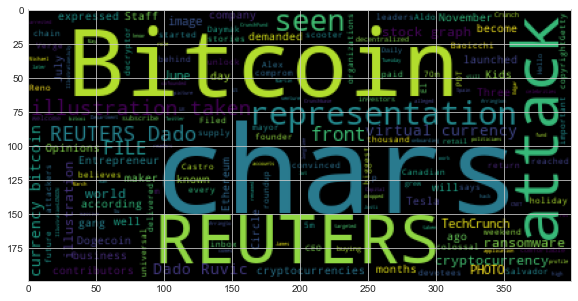

In [49]:
# Generate the Bitcoin word cloud
## Copied from class work and changed the variables to make it work.

btc_cloud = WordCloud().generate(btc_sentiment_df.text.str.cat())
plt.imshow(btc_cloud)

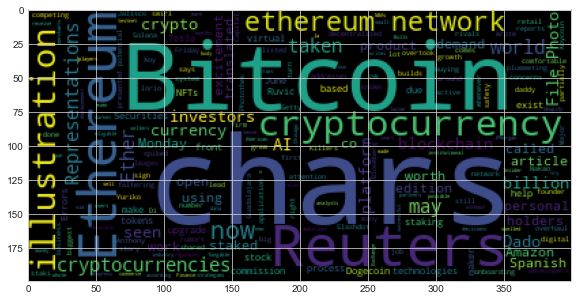

In [50]:
# Generate the Ethereum word cloud
## Copied from class work and changed the variables to make it work.

eth_cloud = WordCloud().generate(eth_sentiment_df.text.str.cat())
plt.imshow(eth_cloud)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [51]:
# Download the language model for SpaCy
## This was in the starter code, but I had to put it "ahead of" the import to make it work on my end.

!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


2021-07-27 16:50:12.667074: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2021-07-27 16:50:12.667100: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [52]:
import spacy
from spacy import displacy

In [53]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [63]:
# Concatenate all of the Bitcoin text together
## Bringin' back the classics-- nice!

btc_concat = btc_sentiment_df['text'].str.cat()

In [64]:
## Let's see if that's right.

print(btc_concat)

Like Dogecoin devotees, the mayor of Reno, and the leaders of El Salvador, Aldo Baoicchi is convinced cryptocurrency is the future. The CEO and founder of Canadian scooter maker Daymak believes this … [+4116 chars]Filed under:
The supply chain attack has reached over a thousand organizations.
Illustration by Alex Castro / The Verge
Three days after ransomware attackers started the holiday weekend by comprom… [+3376 chars]image copyrightGetty Images
The gang behind a "colossal" ransomware attack has demanded $70m (£50.5m) paid in Bitcoin in return for a "universal decryptor" that it says will unlock the files of all … [+4140 chars]To get a roundup of TechCrunchs biggest and most important stories delivered to your inbox every day at 3 p.m. PDT, subscribe here.
Hello and welcome to Daily Crunch for July 23, 2021. Its been an i… [+5456 chars]While retail investors grew more comfortable buying cryptocurrencies like Bitcoin and Ethereum in 2021, the decentralized application world still has

In [65]:
## It worked!

In [69]:
## I had to lean on my group/Google for all this doc stuff, found: https://spacy.io/usage/visualizers

In [70]:
# Run the NER processor on all of the text

doc = nlp(btc_concat)

In [71]:
# Add a title to the document

doc.user_data['title'] = 'BTC NER'

In [73]:
# Render the visualization
## From: https://spacy.io/usage/visualizers#jupyter

displacy.render(doc, style='ent')

In [74]:
# List all Entities
## Copied this line from the study group.

print([ent.text for ent in doc.ents if ent.label_ == 'GPE'])

['Reno', 'El Salvador', 'Aldo Baoicchi', 'UK', 'Spain', 'Los Angeles', 'Dado', 'China']


---

### Ethereum NER

In [66]:
# Concatenate all of the Ethereum text together
## As above

eth_concat = eth_sentiment_df['text'].str.cat()

In [67]:
## Checking it.

print(eth_concat)

There are many blockchain platforms competing for investors’ and developers’ attention right now, from the big daddy of them all, Ethereum, to so-called “Ethereum Killers” like Solana, which we wrote… [+2563 chars]While retail investors grew more comfortable buying cryptocurrencies like Bitcoin and Ethereum in 2021, the decentralized application world still has a lot of work to do when it comes to onboarding a… [+2288 chars]Cryptocurrencies spiked Monday after Amazon listed an open job for a digital currency and blockchain product lead. 
Amazon is known for plummeting the stocks of would-be rivals whenever rumors swirl… [+1425 chars]Bitcoin and Ethereum
Yuriko Nakao
Ether overtook bitcoin in the number of active addresses on its network on Friday, a sign that demand is faltering for the world's biggest cryptocurrency as its co… [+2727 chars]"Anthony Di Iorio, a co-founder of the Ethereum network, says he's done with the cryptocurrency world, partially because of personal safety concern

In [75]:
# Run the NER processor on all of the text
## As above ...

doc = nlp(eth_concat)

In [76]:
# Add a title to the document
## As above ...

doc.user_data['title'] = 'ETH NER'

In [77]:
# Render the visualization
## From: https://spacy.io/usage/visualizers#jupyter

displacy.render(doc, style='ent')

In [78]:
# List all Entities
## As above ...

print([ent.text for ent in doc.ents if ent.label_ == 'GPE'])

['Guadalajara', 'Jalisco', 'London', 'Dado']


---